In [1]:
%load_ext autotime
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from activation import Activation
from preprocessing import PreProcess
from neural_net import NeuralNetwork
from layers import Dense
from other import CrossEntropy
from other import StochasticGradientDescent as SGD

time: 913 ms


In [3]:
pre = PreProcess("Assignment_4_data.txt")
X_train, X_test, y_train, y_test = pre.process(test_size=0.2) 

time: 5.19 s


In [4]:
n_features = X_train.shape[1]
n_features

8404

time: 4.82 ms


In [5]:
network = NeuralNetwork(optimizer= SGD(learning_rate=0.1), loss=CrossEntropy, \
                        validation_data=(X_test, y_test))
network.add(Dense(100, input_shape=(n_features,))).add(Activation('relu'))
network.add(Dense(1)).add(Activation('sigmoid'))

<neural_net.NeuralNetwork instance at 0x7f62d9529c20>

time: 85.6 ms


In [6]:
train_err, test_err = network.fit(X_train, y_train, n_epochs=50, batch_size=2000)

time: 17.8 s


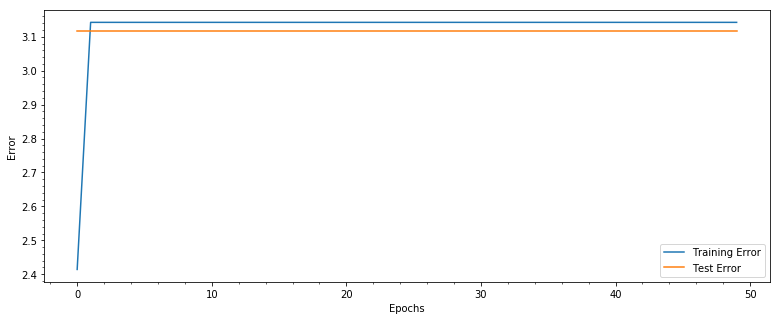

time: 206 ms


In [7]:
epoch = range(len(train_err))
fig, ax = plt.subplots(1,1, figsize=(13,5))
ax.plot(epoch, train_err, label="Training Error")
ax.plot(epoch, test_err, label="Test Error")
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.legend()
plt.minorticks_on()
plt.show()

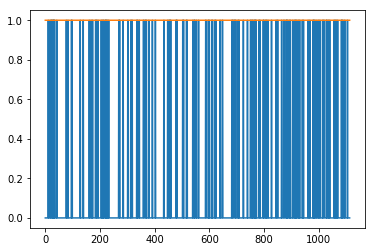

time: 117 ms


In [8]:
y_pred = network.predict(X_test)
y_pred[y_pred > 0.5] = 1.0
y_pred[y_pred <= 0.5] = 1.0
plt.plot(y_test)
plt.plot(y_pred)
plt.show()

In [9]:
_, accuracy = network.test_on_batch(X_test, y_test)
print("Accuracy:", accuracy)

('Accuracy:', 1)
time: 21.3 ms
